# Notebook

## Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from modules.loader import Loader

In [2]:
loader = Loader()
df_cust = loader.load_customers()
df_inv = loader.load_inventory()
df_sal = loader.load_sales_data()
df_sal = loader.add_channels(df_sal, df_cust)
df_sal = loader.add_nls(df_sal, df_inv)

C:\Users\fpsaw\Desktop\42578-Advanced-Business-Analytics\modules\loader.py:113: FutureWarning: The default value of regex will change from True to False in a future version.
  df['username'] = df['username'].str.replace(


In [3]:
df_cust.head()

,id,name,payer_id,payer_name,city,post_code,country_region_code,is_b2c,latitude,longitude,population
0,00001,Prva dimenzija d.o.o.,00001,Prva dimenzija d.o.o.,medvode,1215,SI,False,46.13049,14.40272,15542.0
1,00002,DOBROTIĆ-MONTAŽA D.O.O.,00002,DOBROTIĆ-MONTAŽA D.O.O.,ivanec,HR-42245,HR,True,46.22306,16.12000,5461.0
2,00003,Masivna Pasivna d.o.o.,00003,Masivna Pasivna d.o.o.,trzin,1236,SI,False,46.12527,14.55256,3844.0
3,00005,ZIDARSKA DELA ZVONKO ŠEBALJ S.P.,00005,ZIDARSKA DELA ZVONKO ŠEBALJ S.P.,leskovec pri krškem,8273,SI,False,45.93566,15.47184,1021.0
4,00006,MARCHIOL d.o.o.,00006,MARCHIOL d.o.o.,nova gorica,5000,SI,True,45.95604,13.64837,13178.0


In [4]:
df_inv.head()

,sku,descr,brand,quantity,last_cost,unit_price,category,NLS
0,00001,NASTAVEK ZA MEŠANJE A F1=60MM,PROLINE,10,0.73,2.28,NaN,False
1,00002,NASTAVEK ZA MEŠANJE MASE 80x400 TIP A,PROLINE,18,1.49,4.86,NaN,False
2,00003,NASTAVEK ZA MEŠANJE MASE 100X500 TIPA,PROLINE,10,2.10,6.15,NaN,False
3,00004,NASTAVEK ZA MEŠANJE MASE 80x400 TIP B,PROLINE,14,1.67,4.86,NaN,False
4,00005,NASTAVEK ZA MEŠANJE MASE 100X500 TIP B,PROLINE,0,1.48,6.00,NaN,False


In [5]:
df_sal.head()

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS
0,20298,080001,080001,PRA19-00001,2019-07-10,1,-3.31,7.88,SHOP,False,SHOP,False
1,X50137,080001,080001,PRA19-00002,2019-07-10,1,-3.09,6.18,SHOP,False,SHOP,False
2,X51108,080001,080001,PRA19-00002,2019-07-10,1,-1.72,3.64,SHOP,False,SHOP,True
3,10713,080001,080001,PRA19-00006,2019-07-10,1,-2.66,6.33,SHOP,False,SHOP,False
4,1-30-497,901105,901105,PRA19-00007,2019-07-10,2,-5.42,7.26,SHOP,False,SHOP,False


In [35]:
def plot_sales_data(df):
    # Aggregate sales to month-year
    df = df_sal.set_index('ddate')
    df = df.resample('MS').sum()

    # Define plot
    plt.rcParams['figure.figsize'] = [20, 5]
    fig, ax = plt.subplots()
    ax.plot(df.index, df['price'], label="sales")
    
    # Change x_axis to show month and year with correct (centered) intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%B'))
    fmt_month = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)
    ax.ticklabel_format(useOffset=False, style='plain', axis='y')
    
    # Show sales values for each month-year
    for i,j in zip(df.index, df.price):
        ax.annotate(str(int(j)), xy=(i,j))

    # Add lines to locate consecutive years easier
    for year in ['2018', '2019', '2020', '2021', '2022']:
        ax.axvline(pd.Timestamp(f"{year}-01-01"), color='b', linestyle='--')

    # Final styling options
    plt.title(f"Montly Sales Data")
    plt.xticks(rotation=50)
    plt.grid()
    plt.legend(loc="upper left")
    plt.show()

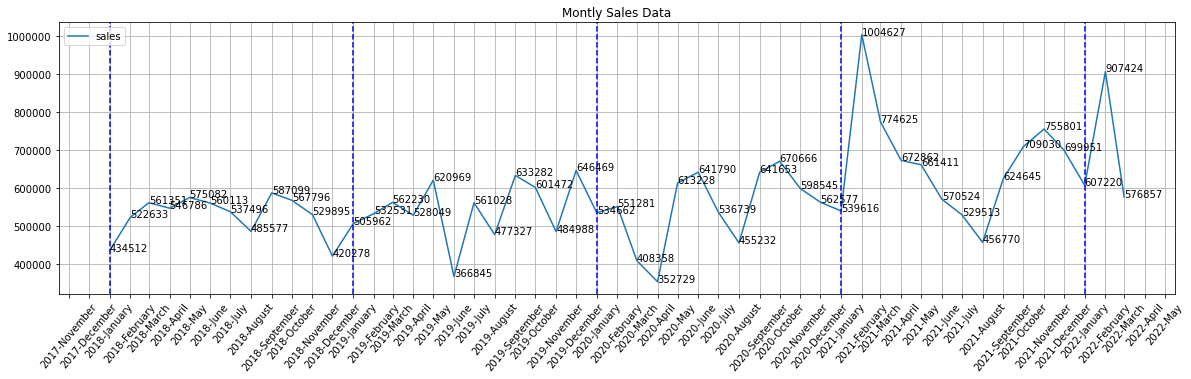

In [36]:
plot_sales_data(df_sal)

In [37]:
df_sal

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS,profit
0,20298,080001,080001,PRA19-00001,2019-07-10,1,-3.31,7.88,SHOP,False,SHOP,False,4.57
1,X50137,080001,080001,PRA19-00002,2019-07-10,1,-3.09,6.18,SHOP,False,SHOP,False,3.09
2,X51108,080001,080001,PRA19-00002,2019-07-10,1,-1.72,3.64,SHOP,False,SHOP,True,1.92
3,10713,080001,080001,PRA19-00006,2019-07-10,1,-2.66,6.33,SHOP,False,SHOP,False,3.67
4,1-30-497,901105,901105,PRA19-00007,2019-07-10,2,-5.42,7.26,SHOP,False,SHOP,False,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406319,DT2061,900059,900059,PDO22+05287,2022-03-23,1,-2.22,6.23,SHOP,False,SHOP,False,4.01
406320,DT20707,900059,900059,PDO22+05287,2022-03-23,1,-5.85,19.31,SHOP,False,SHOP,False,13.46
406321,DT20704,900059,900059,PDO22+05287,2022-03-23,1,-4.94,10.77,SHOP,False,SHOP,False,5.83
406322,DT2344,900059,900059,PDO22+05287,2022-03-23,1,-6.44,14.27,SHOP,False,SHOP,False,7.83


# Cohort Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [4]:
df_sal.head()

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS
0,20298,080001,080001,PRA19-00001,2019-07-10,1,-3.31,7.88,SHOP,False,SHOP,False
1,X50137,080001,080001,PRA19-00002,2019-07-10,1,-3.09,6.18,SHOP,False,SHOP,False
2,X51108,080001,080001,PRA19-00002,2019-07-10,1,-1.72,3.64,SHOP,False,SHOP,True
3,10713,080001,080001,PRA19-00006,2019-07-10,1,-2.66,6.33,SHOP,False,SHOP,False
4,1-30-497,901105,901105,PRA19-00007,2019-07-10,2,-5.42,7.26,SHOP,False,SHOP,False


1) First we do a quick EDA to understand a bit better the data we are dealing

In [5]:
df_sal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quantity,406324.0,4.017543,21.444953,-1520.00,1.00,2.00,4.0,6000.00
cost,406324.0,-49.267737,313.885103,-44696.61,-38.68,-10.82,-3.5,31300.01
price,406324.0,67.096643,496.481962,-65209.90,5.80,16.73,53.6,132514.49


For the table above, we can see that there are orders with negative quantity (most likely returns). We remove negative values, the main reason is if we maintain the data a bias will be created (sell orders and return orders in the same dataset). 

With that being said, now we calculate an aggregate method to see how many orders were placed by each customer

In [6]:
n_orders =df_sal.groupby(['cust_id'])['invoice_no'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df_sal['cust_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once. (Data with negative values)')

60.05% of customers ordered more than once. (Data with negative values)


**Distribution of orders**

c:\users\fpsaw\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


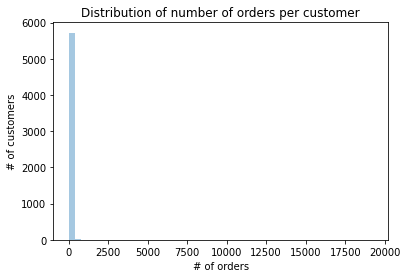

In [7]:
ax = sns.distplot(n_orders, kde = False, hist = True)
ax.set(title = 'Distribution of number of orders per customer',
      xlabel ='# of orders',
      ylabel = '# of customers');

**Cohort**

In [11]:
sales = df_sal[['cust_id', 'invoice_no', 'ddate']].drop_duplicates()

In [12]:
sales['order_month'] = sales['ddate'].dt.to_period('Q')
sales['cohort'] = sales.groupby('cust_id')['ddate'].transform('min').dt.to_period('Q')

In [13]:
df_cohort = sales.groupby(['cohort', 'order_month' ]).agg(n_customers = ('cust_id', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [14]:
cohort_pivot = df_cohort.pivot_table(index ='cohort', columns = 'period_number', values = 'n_customers')

**Retention Matrix**

In [15]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

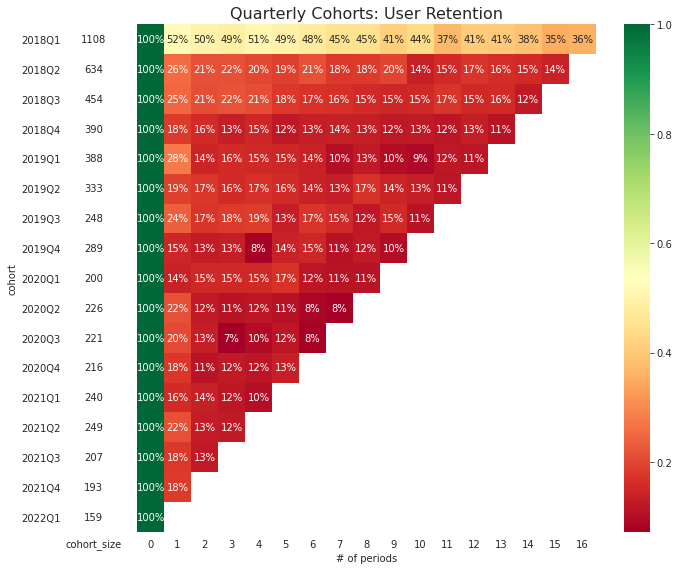

In [19]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Quarterly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

As we can see, we perceive a great decline in customer retention, however the first line where there are the oldest customers performs exceptionally well, in four years the company still retains 30% of the customers acquired in that period.

**RFM Clustering**

In [20]:
#creating a profit column
df_sal['profit'] = df_sal['price'] + df_sal['cost']
df_sal.head()

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS,profit
0,20298,080001,080001,PRA19-00001,2019-07-10,1,-3.31,7.88,SHOP,False,SHOP,False,4.57
1,X50137,080001,080001,PRA19-00002,2019-07-10,1,-3.09,6.18,SHOP,False,SHOP,False,3.09
2,X51108,080001,080001,PRA19-00002,2019-07-10,1,-1.72,3.64,SHOP,False,SHOP,True,1.92
3,10713,080001,080001,PRA19-00006,2019-07-10,1,-2.66,6.33,SHOP,False,SHOP,False,3.67
4,1-30-497,901105,901105,PRA19-00007,2019-07-10,2,-5.42,7.26,SHOP,False,SHOP,False,1.84


In [21]:
#duplicating the dataframe for analysis
df_sales = df_sal

In [22]:
#creating dataset and removing negative values
chunk_list = []
for chunk in df_sales:
    condition_to_drop = df_sales[df_sales['price']<=0]
    df_sales.drop(condition_to_drop.index, inplace = True)
    df_sales = df_sales.sort_values(by=['ddate'])
    #df_sales.set_index('ddate', inplace = True)
    chunk_list.append(df_sales)
    
df_sales = pd.concat(chunk_list)
print(df_sales.info())
df_sales.head(10)
    
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843046 entries, 214086 to 406323
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   sku           object        
 1   cust_id       object        
 2   payer_id      object        
 3   invoice_no    object        
 4   ddate         datetime64[ns]
 5   quantity      int32         
 6   cost          float64       
 7   price         float64       
 8   sales_person  object        
 9   is_return     bool          
 10  channel       object        
 11  NLS           bool          
 12  profit        float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 434.2+ MB
None


,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS,profit
214086,DT2354,902498,902498,PDO18+00006,2018-01-04,1,-6.88,14.21,SHOP,False,SHOP,False,7.33
213492,X27025,080001,080001,PRA18-00011,2018-01-04,1,-2.55,5.54,SHOP,False,SHOP,True,2.99
228529,DCH253M2,905930,905930,PRA18-00020,2018-01-04,1,-271.75,434.34,SHOP,False,SHOP,False,162.59
259636,1-12-204,080001,080001,PDO18+00002,2018-01-04,1,-22.86,36.34,SHOP,False,SHOP,False,13.48
155582,1-54-686,902498,902498,PDO18+00006,2018-01-04,1,-7.97,17.73,SHOP,False,SHOP,True,9.76
193268,X33096,080001,080001,PRA18-00008,2018-01-04,2,-4.27,9.30,SHOP,False,SHOP,True,5.03
162957,142010009,080001,080001,PRA18-00007,2018-01-04,2,-1.89,6.48,SHOP,False,SHOP,True,4.59
278217,DT3502,900773,900773,PDO18+00007,2018-01-04,1,-3.92,7.83,SHOP,False,SHOP,False,3.91
259813,DWE305PK,902498,902498,PDO18+00006,2018-01-04,1,-81.25,130.25,SHOP,False,SHOP,False,49.00
169808,X60506,080001,080001,PRA18-00038,2018-01-04,1,-2.11,4.60,SHOP,False,SHOP,True,2.49


In [23]:
#indexing date and copying for further analysis
df_sales['invoice_date'] = df_sales['ddate']
df_sales = df_sales.set_index('invoice_date')
df_sales['invoice_date'] = df_sales.index
df_sales.head()

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS,profit,invoice_date
invoice_date,,,,,,,,,,,,,,
2018-01-04,DT2354,902498,902498,PDO18+00006,2018-01-04,1,-6.88,14.21,SHOP,False,SHOP,False,7.33,2018-01-04
2018-01-04,X27025,080001,080001,PRA18-00011,2018-01-04,1,-2.55,5.54,SHOP,False,SHOP,True,2.99,2018-01-04
2018-01-04,DCH253M2,905930,905930,PRA18-00020,2018-01-04,1,-271.75,434.34,SHOP,False,SHOP,False,162.59,2018-01-04
2018-01-04,1-12-204,080001,080001,PDO18+00002,2018-01-04,1,-22.86,36.34,SHOP,False,SHOP,False,13.48,2018-01-04
2018-01-04,1-54-686,902498,902498,PDO18+00006,2018-01-04,1,-7.97,17.73,SHOP,False,SHOP,True,9.76,2018-01-04


**Choosing the date for clustering (currently 4 years)**

In [24]:
#setting date for clustering and period of time
end_date = df_sales.index.max()
from dateutil.relativedelta import relativedelta
start_date = end_date - relativedelta(years = 4)

In [25]:
#setting up timeframe
snapshot_date = end_date + relativedelta(days=1)

In [26]:
study_df = df_sales
data_rfm = study_df.groupby(['cust_id']).agg({
    'invoice_date' : lambda x : (snapshot_date - x.max()).days,
    'invoice_no':'nunique',
    'price':'sum'
})


data_rfm.rename(columns ={
    'invoice_date':'Recency',
    'invoice_no':'Frequency',
    'price':'MonetaryValue'
},inplace = True)

print(data_rfm.sort_values(by=['Recency']))

         Recency  Frequency  MonetaryValue
cust_id                                   
900272         1         19       14688.57
222222         1        262      402403.04
06660          1         84       83834.01
02271          1          5      167130.99
07606          1        155      888117.75
...          ...        ...            ...
10002       1538          1       10225.28
906421      1539          1        1372.54
906995      1539          1        1245.01
09871       1539          1         544.44
902633      1540          1         488.93

[5734 rows x 3 columns]


In [27]:
data_rfm_log = np.log(data_rfm)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_rfm_log)

#store it separately for clustering
data_rfm_standard = scaler.transform(data_rfm_log)

#turn the processed data back into a dataframe
data_rfm_standard = pd.DataFrame(data = data_rfm_standard, 
                                index = data_rfm.index, 
                                columns = data_rfm.columns) 

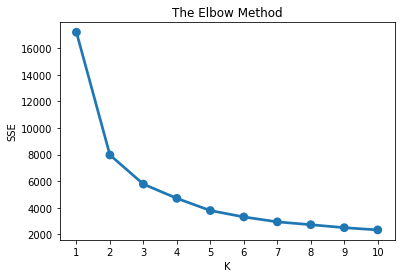

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

#fit KMeans and calculate SSE for each K
sse = {}
for k in range(1,11):
	kmeans = KMeans(n_clusters = k, random_state=1)
	kmeans.fit(data_rfm_standard)
	sse[k] = kmeans.inertia_ 

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() 

In [37]:
kmeans = KMeans(n_clusters = 4, random_state=1)
#compute k-means clustering on pre-processed data
kmeans.fit(data_rfm_standard)
#extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_ 

In [38]:
df_k3 = data_rfm.assign(Cluster = cluster_labels) 

In [39]:
summary = df_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
    })
print(summary) 

            Recency   Frequency  MonetaryValue      
               mean        mean           mean count
Cluster                                             
0         88.015094    2.855346    4812.368616   795
1         33.553082  134.541096  551446.744452   584
2        863.433913    1.388980    1721.103854  3049
3        433.755743   10.131700   40158.334441  1306


# Conclusions from the RFM and Visualization

From the calculation we can analyze that cluster 0 has the most loyal customers, who bring in more money and the most frequent in transactions. In our reading we understand that cluster 0 should be prioritized to increase the growth potential

RFM model in particular is at the core of customer segmentation. RFM studies customers’ behaviour and cluster them by using three metrics:

**Recency (R):** measure the number of days since the last purchase to a hypothetical snapshot day. (Time since last order or last engaged with the product)

**Frequency (F):** measure the number of transaction made during the period of study (total number of transaction during timeframe)

**Monetary Value (M):** Measure how much money each customer has spent during the period of study. (Total number of valuable transactions)


In [40]:
df_k3_outlier = df_k3
df_k3_outlier['cust_id'] = df_k3.index
df_k3_outlier= df_k3_outlier[df_k3_outlier.cust_id != '080001']

In [42]:
df_k3_outlier


,Recency,Frequency,MonetaryValue,Cluster,cust_id
cust_id,,,,,
00002,923,2,13147.81,3,00002
00003,528,3,4323.67,3,00003
00009,650,1,37.44,2,00009
00013,965,2,121.68,2,00013
00014,10,6,17466.28,0,00014
...,...,...,...,...,...
907168,391,3,8904.35,3,907168
996,43,42,620860.37,1,996
997,43,44,780003.51,1,997


In [45]:
import plotly.express as px
from plotly.offline import iplot

fig = px.scatter_3d(df_k3_outlier, x='Recency', y='Frequency', z='MonetaryValue',
                    hover_data=[df_k3_outlier.index],
                    title='RFM Clustering of Clients',
                   color='Cluster')
iplot(fig) 

**Profitability by SKU**

In [46]:
df_sal['Margin'] = (df_sal['profit'] / df_sal['price'])*100
df_margin = df_sal.sort_values(by=['quantity'], ascending = False)
df_margin = df_margin[:100]
df_margin = df_margin.reset_index()
df_margin.head()

,index,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS,profit,Margin
0,72290,44011,00291,906760,PDO20+05772,2020-04-21,6000,-1235.32,1632.00,VEDRAN,False,B2B,False,396.68,24.306373
1,304069,44011,00291,906760,PDO21+04506,2021-03-16,3000,-603.84,816.00,OFFICE,False,B2B,False,212.16,26.000000
2,339346,44011,00291,906760,PDO21+12849,2021-07-13,2585,-546.22,725.09,RADMAN,False,B2B,False,178.87,24.668662
3,339383,44113,390113,390113,PDO21+12850,2021-07-13,2240,-568.42,739.20,OFFICE,False,B2B,False,170.78,23.103355
4,296784,SET NOŽ_METER,10836,906760,PDO21+02872,2021-02-19,2004,-5378.42,16011.96,OFFICE,False,B2B,False,10633.54,66.409984


In [47]:
import plotly.express as px
from plotly.offline import iplot

fig = px.scatter_3d(df_margin, x='Margin', 
                   y='price', z='quantity', title= 'Total Profitability by SKU ',color='sku')
iplot(fig) 

In [48]:
df_price = df_margin[['sku','price']]
df_price = df_price.groupby(['sku']).mean().reset_index()

df_mar = df_margin[['sku','Margin']]
df_mar = df_mar.groupby(['sku']).mean().reset_index()

df_qa = df_margin[['sku','quantity']]
df_qa = df_qa.groupby(['sku']).mean().reset_index()

In [49]:
results = df_price.set_index('sku').join(df_mar.set_index('sku'))
results = results.reset_index()
results = results.set_index('sku').join(df_qa.set_index('sku'))
results = results.reset_index()

In [50]:
#filtering only positive margin
results = results.drop_duplicates(subset=['sku'])
results = results[(results.Margin >= 0)] 

In [51]:
import plotly.express as px
from plotly.offline import iplot

fig = px.scatter_3d(results, x='Margin', 
                   y='price', z='quantity', title = 'Average Profitability by SKU', color = 'sku')
iplot(fig) 

In [52]:
#Products with the most profitability
results = results.sort_values(by ='Margin', ascending = False)
results = results.reset_index()
results

,index,sku,price,Margin,quantity
0,5,42001,499.80000,54.347739,1200.000000
1,42,STA60490,9182.90000,47.904692,802.000000
2,41,SET NOŽ_METER,10887.32000,46.535559,1901.333333
3,9,44014,185.00000,35.124324,500.000000
4,8,44013,160.00000,33.418750,500.000000
5,1,1-30-697,3672.00000,30.294118,1080.000000
6,0,1-03-851,255.96500,29.722172,623.000000
7,2,1-47-329,292.50000,29.718235,720.000000
8,23,BDCHD18BAFC,44335.00000,29.383377,500.000000
9,38,L240508K,474.00000,29.103376,600.000000


## Notes

Questions to CEO:
- Returns -> do they have the same invoice_no? (only in sales) 
    - A: No it's different (in quantity + is sales - is return) **DONE: ADDED COL is_return in sales data**
- Negative values in cost, price and quantity? (only in sales) 
    - A: The same as quantity (see above) **DONE: returns have negative price, quantity and cost**
- Focus on specific customers? 
    - A: (No, its already filtered out, maybe some garbage to remove by us) **TODO: after EDA**
- List useless items to filter out? 
    - A: (All items that have SKU starting with 188R...) **DONE: in dataloader**
- Some records to remove from sales data? 
    - A: (products that have in product description NLS "No Longer Available") **DONE: added NLS in inventory and in df_sal with loader.add_nls**
- SHOP sales_person is that another sales chanel? 
    - A: Yes (b2b, b2c and SHOP) **DONE: by updating df_sal with loader.add_channels**
- Why such a spike in sales in January?
    - a lot of inventory is bought in December (some trade deal) + some other minor reasons that accumulate sales in January
- Why no spike in sales in January of 2020 (covid started in march)
    - in 2021 new big client (KONZUM) later he returned a lot of stuff in August (they sold only 30% due to bad business deal, 2022 is better in that regard)
- Internet SHOP channel? (WEB?)
    - Ignore, minor sales not important (for now)
- Rebate (buy drill get other accessories for free?)
    - Impossible to know, some clients have special promos, price etc. so unit price is different than what is in inventory
    - There is no marker/column that would indicate that
- Why so many customers lost in cohort analysis
    - No idea, we would like to know more about that. We were aware of that issue but not really about the magnitude and reasons. That would be very usefull for us!

Considerations:
- For Recommendation System: what to do with returns, do we filter out? or include that?
- Sales currency is all in euro and with marginal influence of inflation (we don't need to care about that)

Data Analysis Ideas

- Top sales, margin and quantity items  (best products)
- Top sales, margin and quantity customer (best customers)
- Top sales, margin and quantity brands (best brands)
- Top sales, margin and quantity by sales_person
- Find seasonality in total sales, categories
- Visualize customer location by sales volume
- List top cities by sales, brands and categories
- Find products which are deprecated (haven't been sold for over 6months)
- Association rules for products (products commonly sold together)
- Association rules for categories (categories commonly sold together)
- Check b2b and b2c sales how they compare

- Average invoice_no size (per country) or distribution?
- Sales price distribution for selected products?
- Plot of unit sold and price for selected products, categories, brands by month-year?

- Average life-span of all/selected products? (important for recommendation system)
- Average time between purchases?

TASK (Felipe):
- Genreric analysis of different products and categories
- Seasonality Analysis of sales data (quantity, profit etc.)
- Analysis of sales channels and returns

TASK (Alex):
- Generic analysis of different customers (profitability, sales volume etc.)
- Cohort Analysis (by client ID and product)
- RFM clustering of customers

TASK (Filip):
- Map Visualization and country/city
- Association Rules of sales data (on sku and category)